<b> In this notebook we look at how the categorial features, namely the game genres correlate with sentiment rating. Most importantly, the mmo ("massively online multiplayer") genre seems to be an indicator that influences the splitting of other variables such as number of updates / update time - reason being that this particular genre tends to have frequent updates due to the nature of its online play. </b>

Therefore, when the Random Forest model splits this feature (is_mmo = 0 or 1), it naturally splits the samples and their distributions in other components of the feature space into populations closer to the median / closer to the tail (high number of updates/ low update times).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# note: mean_time is in days
cont_vars = ['num_pre', 'num_post', 'mean_time', 'score','num_reviews','sentiment']
cat_vars = ['is_action', 'is_adventure', 'is_casual', 'is_mmo', 'is_racing', 'is_rpg', 'is_simulation', 'is_sports','is_strategy']

data = pd.read_csv('../data/features_vec_all.csv', usecols=cont_vars+cat_vars)

In [51]:
cat_data = data.drop(columns=['score', 'num_reviews', 'num_pre', 'num_post', 'mean_time'])

In [52]:
M = np.zeros((3,len(cat_vars)))
counts_per_sentiment = cat_data.groupby(['sentiment']).count().values[:,0]

for i in cat_data.index:
    k = int(data.at[i, 'sentiment'] + 1) # (-1, 0, 1) -> (0, 1, 2)

    for j in range(len(cat_vars)):
        if cat_data.at[i, cat_vars[j]] == 1:
            M[k][j] += 1 / counts_per_sentiment[k]


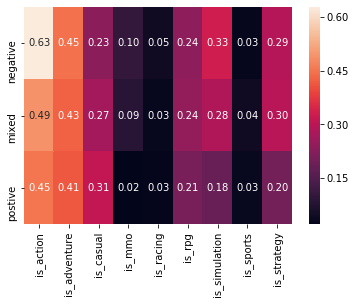

In [55]:
x_labels = cat_vars
y_labels = ['negative', 'mixed', 'postive']
sns.heatmap(M,annot=True, fmt = ".2f", xticklabels=x_labels, yticklabels = y_labels)

<b> Some genres contribute to more extreme outliers in the distribution of other features. </b>

Text(0, 0.5, '# post-releaes updates')

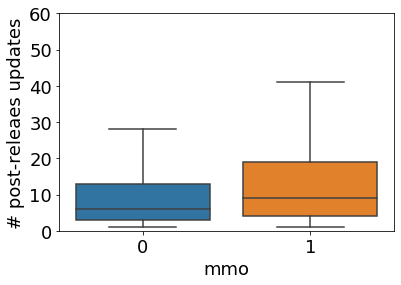

In [60]:
sns.boxplot(x=data['is_simulation'], y=data['num_post'], fliersize=0)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim((0, 60))
plt.xlabel('mmo', fontsize=18)
plt.ylabel('# post-releaes updates', fontsize=18)
#plt.savefig('action_numpost_boxplot.png', bbox_inches='tight')

Text(0, 0.5, 'mean update time')

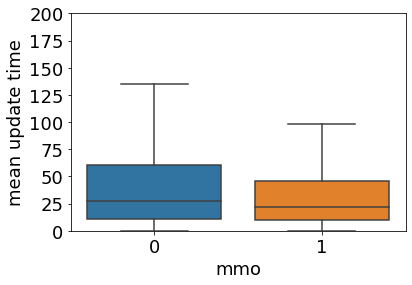

In [59]:
sns.boxplot(x=data['is_simulation'], y=data['mean_time'], fliersize=0)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim((0, 200))
plt.xlabel('mmo', fontsize=18)
plt.ylabel('mean update time', fontsize=18)
#plt.savefig('mmo_mean_time_boxplot.png', bbox_inches='tight')